In [1]:
import ptc_twiss.madx_configuration as twiss_conf
import ptc_twiss.matrix_indexes as twiss_indexes
import ptc_twiss.optics_parameters as twiss_optics_parameters
import ptc_twiss.particles_trajectory_generator as twiss_ptg
import ptc_track.madx_configuration as track_conf
import ptc_track.matrix_indexes as track_indexes
import ptc_track.optics_parameters as track_optics_parameters
import ptc_track.particles_trajectory_generator as track_ptg
import visualization.optics_parameter_visualisation as plotter
import approximator.runner as app_runner
import approximator.optics_parameters as app_op
import approximator.matrix_indexes as app_indexes
import approximator.particles_trajectory_generator as app_ptg
import data.bunch_configuration as buc
import os
import matplotlib.pyplot as plt
import seaborn as sns
import comparators.transport as transport
import models.train_model as tram
import models.approximator as stub_app

Welcome to JupyROOT 6.18/00


In [2]:
sns.set_style("whitegrid")

In [3]:
path_to_project = "/eos/user/r/rmucha/SWAN_projects"
folder_name = "2017_matched"
script_file_name = "inputmadx_matched.madx"
xml_file_name = "configuration_reco_beam1.xml"

In [4]:
path_to_script = os.path.join(path_to_project, folder_name, script_file_name)
s = 219.55
twiss_configuration = twiss_conf.TwissConfiguration(path_to_script, s)

In [5]:
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 0
track_configuration = track_conf.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [6]:
parametrisation_file_name = "new_parametrization_6500GeV_0p4_total.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_file = os.path.join(path_to_project, folder_name, parametrisation_file_name)
source_folder_name = "optics_generator_python"
path_to_sources = os.path.join(path_to_project, source_folder_name)
approximator = app_runner.get_approximator(path_to_sources, path_to_file, approximator_name)

In [7]:
parametrisation_file_name = "new_parametrization_6500GeV_0p4_120.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_file = os.path.join(path_to_project, folder_name, parametrisation_file_name)
source_folder_name = "optics_generator_python"
path_to_sources = os.path.join(path_to_project, source_folder_name)
approximator_120 = app_runner.get_approximator(path_to_sources, path_to_file, approximator_name)

In [8]:
parametrisation_file_name = "new_parametrization_6500GeV_0p4_140.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_file = os.path.join(path_to_project, folder_name, parametrisation_file_name)
source_folder_name = "optics_generator_python"
path_to_sources = os.path.join(path_to_project, source_folder_name)
approximator_140 = app_runner.get_approximator(path_to_sources, path_to_file, approximator_name)

In [9]:
parametrisation_file_name = "new_parametrization_6500GeV_0p4_160.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_file = os.path.join(path_to_project, folder_name, parametrisation_file_name)
source_folder_name = "optics_generator_python"
path_to_sources = os.path.join(path_to_project, source_folder_name)
approximator_160 = app_runner.get_approximator(path_to_sources, path_to_file, approximator_name)

In [11]:
# Parameters of training
x_mean = 0.0
sigma_x = 4e-3
theta_x_mean = 0.000
sigma_theta_x = 1.3e-3
y_mean = 0.0
sigma_y = 4e-3
theta_y_mean = 0.00
sigma_theta_y = 1.3e-3
pt_mean = -0.15
sigma_pt = 0.2

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 10000

bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

home = "/eos/user/r/rmucha/SWAN_projects"
prototype_approximator = tram.train_prototype(bunch_configuration, track_configuration, home)

In [12]:
title_sufix = r"2017 matched, $\xi=0$, set delta p and XA"
transporter1 = "ptc_twiss"
transporter2 = "ptc_track"
transporter3 = "app_total"
# transporter4 = "approximator_120"
# transporter5 = "approximator_140"
transporter6 = "app_160"
transporter7 = "prototype_total"

In [13]:
transporters = {
#     transporter1: (twiss_ptg.generate_from_range, twiss_configuration, twiss_indexes.ptc_twiss),
    transporter2: (track_ptg.generate_from_range, track_configuration, track_indexes.ptc_track),
    transporter3: (app_ptg.generate_from_range, approximator, app_indexes.indexes),
#     transporter4: (app_op.compute_d_x, approximator_120),
#     transporter5: (app_op.compute_d_x, approximator_140),
#     transporter6: (app_ptg.generate_from_range, approximator_160, app_indexes.indexes)
    transporter7: (app_ptg.generate_from_range, prototype_approximator, app_indexes.indexes)
}

In [14]:
x_mean = 0
sigma_x = 0
theta_x_mean = 140e-6 + 150e-6
sigma_theta_x = 0
y_mean = -1.5e-3
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
pt_mean = -0.1
sigma_pt = 0.1

x_resolution = 1
theta_x_resolution = 1
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 21

bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, x_resolution,
                                                       theta_x_mean, sigma_theta_x, theta_x_resolution,
                                                       y_mean, sigma_y, y_resolution,
                                                       theta_y_mean, sigma_theta_y, theta_y_resolution,
                                                        pt_mean, sigma_pt, pt_resolution)

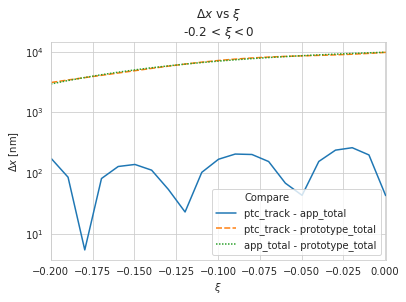

In [15]:
transport.compare(bunch_configuration, transporters, "x", "pt", title_sufix=r"-0.2 < $\xi < 0$") #scatterplot don't work!!!

In [16]:
k = transport.compare_heatmap(bunch_configuration, (transporter2, (track_ptg.generate_from_range, track_configuration, track_indexes.ptc_track)), (transporter3, (app_ptg.generate_from_range, approximator, app_indexes.indexes)), "x", "pt") #scatterplot don't work!!!

             x             pt
0   173.525486 -199712.394400
1    85.767732 -189712.394400
2     5.448125 -179712.394400
3    81.598706 -169712.394400
4   128.738122 -159712.394400
5   139.069367 -149712.394400
6   112.043199 -139712.394400
7    54.044141 -129712.394400
8    22.944737 -119712.394400
9   103.123624 -109712.394400
10  169.408715  -99712.394420
11  206.325247  -89712.394420
12  202.937188  -79712.394420
13  155.346931  -69712.394420
14   68.418348  -59712.394420
15   43.167436  -49712.394420
16  155.792202  -39712.394420
17  239.388364  -29712.394420
18  262.429915  -19712.394420
19  199.559233   -9712.394422
20   42.770392     287.605578


In [ ]:
import importlib
importlib.reload(transport)

In [ ]:
sns.kdeplot(k)